<a href="https://colab.research.google.com/github/kszymon/machine-learning-bootcamp/blob/main/unsupervised%20/01_clustering/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Algorytm K-średnich](#2)
4. [WCSS - Within-Cluster Sum-of-Squared](#3)
5. [Metoda "łokcia" - Elbow Method](#4)
6. [Wizualizacja klastrów](#5)

### <a name='0'></a> Import bibliotek

In [118]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

### <a name='1'></a> Wygenerowanie danych

In [119]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

### <a name='2'></a> Algorytm K-średnich

In [120]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [121]:
# wcss
kmeans.inertia_

3870.0508007981293

In [122]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,3
2,-4.666211,-5.390080,3
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [123]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 5 klastrów',
           template='plotly_dark')

### <a name='3'></a> WCSS - Within-Cluster Sum-of-Squared

In [124]:
wcss = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695978, 7734.886635126091, 4282.137026938605, 3889.2214058640843, 3462.2976008131227, 3042.3851394535213, 2842.9194931015854, 2470.4179147099353, 2422.7997562784644, 2116.4788299049656, 1970.8096406721982, 1907.630759345142, 1787.5003835945731, 1559.0105601914372, 1445.6995117310526, 1436.55922317534, 1313.6266615556126, 1290.8770197541583]


In [125]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3889.221406
4,5,3462.297601


### <a name='4'></a> Metoda "łokcia" - Elbow Method

In [126]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

### <a name='5'></a> Wizualizacja klastrów

In [127]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry',
           template = 'plotly_dark')

In [128]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-5.302413,-5.404200
1,3.630348,1.808377
2,-4.678306,6.633539


In [129]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500,
                 title='Algorytm K-średnich - 3 klastry', template = 'plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width':2, 'color': 'tomato'}},
                         showlegend=False))
fig.show()

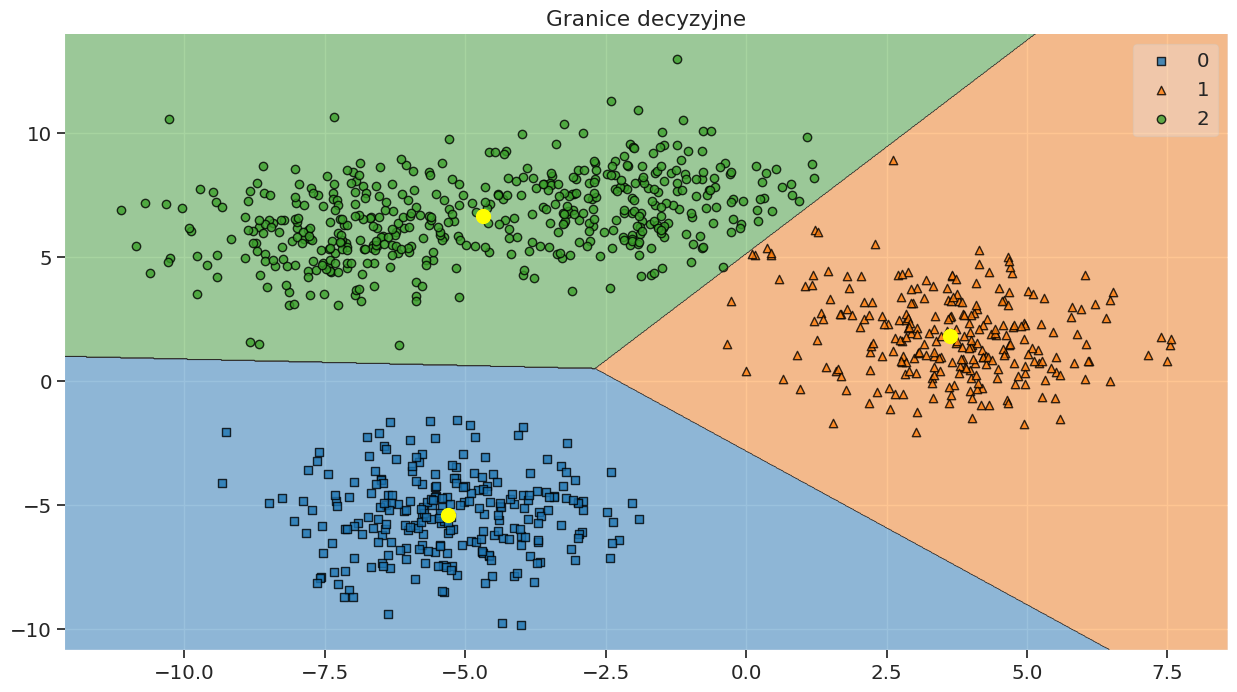

In [130]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow')
plt.show()